<a href="https://colab.research.google.com/github/hernandosalas/Code/blob/master/Machine%20Learning/workbench.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix,mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection, ensemble, linear_model, neighbors, svm, tree, neural_network, svm,model_selection, naive_bayes, ensemble, discriminant_analysis, gaussian_process

In [21]:
# Hide Warnings
import warnings
warnings.filterwarnings('ignore')

In [44]:
# LOAD CSV FROM LINK
def loadCSV(csvfilelink):
	dataRaw = pd.read_csv(csvfilelink, header=0, sep=',', quotechar='"')
	data = dataRaw.copy()
	return data

# LOADING CSV TO GOOGLE COLAB
def loadCSVGoogleColab():
	from google.colab import files
	uploaded = files.upload() 


# PROVIDE DATAFRAME INFO
def dataInfo(df):
	# Well know question is is there any NaN value and length of this data so lets look at info
	df.info()
	print("\n")
	# How many NaNs
	print("---How many NaNs---","\n")
	print(df.isnull().sum(),"\n")
	# Dataframe Shape
	print("---Dataframe Shape---","\n")
	print (df.shape)
 
#JOIN TRAIN AND TEST DATASETS
def joinTrainTest(trainCSV,testCSV):
	trainData = pd.read_csv(trainCSV, header=0, sep=',', quotechar='"')
	testData = pd.read_csv(testCSV, header=0, sep=',', quotechar='"')
	dataRaw= pd.concat([trainData,testData])
	data = dataRaw.copy()
	return data

# Feature Selection (Dropping features not needed)	
def dropFeatures(df,featuresList):
	drop_elements = featuresList
	df = df.drop(drop_elements, axis = 1)
	return df  

# DROP NANs
def dropNAN(df):
	print("---Before dropping NaNs---","\n")
	print (df.shape)
	df = df.dropna()
	print("---After dropping NaNs---","\n")
	print (df.shape)
	return df

# Plot Features Correlations
def featuresCorrelation (df):
	#Lets see the Correlation between the features
	plt.figure(figsize=(14,12))
	sns.heatmap(df.astype(float).corr(),linewidths=0.1, 
				square=True,  linecolor='white', annot=True)
	plt.show()
 
#Split data train and test
def splitTrainTest(df,targetName):
	x_train, x_test, y_train, y_test = train_test_split(df.drop([targetName], axis = 1), df[targetName], test_size=0.2, random_state=42)
	return x_train, x_test, y_train, y_test

# Remove Outliers based on stddev
def removeOutliers(df,stddev):
		print ("Dataframe shape before removing outliers")
		print (df.shape)
		df = df[(np.abs(stats.zscore(df)) < stddev).all(axis=1)]
		print ("Dataframe shape after removing outliers")
		print (df.shape)
		return df

# Plot Target
def plotTarget(df):
	ax = sns.countplot(df.iloc[:,-1],label="Count")
	A, B = df.iloc[:,-1].value_counts()
	print('Number that Died: ',A)
	print('Number that Survived : ',B)

# Data Visualization
def dataVisual(df,targetName):
		sns.pairplot(data=df,hue=targetName, dropna=True)
		df.plot(kind='density', subplots=True, layout=(3,3), sharex=False)
		plt.show()
		#Distribution Plot per Feature
		#sns.distplot(data.Age)
		#Violin Plot per Feature
		#sns.violinplot(x='Survived', y='Age', data=data)

#Normalizing Numerical Features
def normalizeNumericalFeatures(df,featuresList):
	scaler = MinMaxScaler() # default=(0, 1)
	features_log_minmax_transform = pd.DataFrame(df = features_log_transformed)
	features_log_minmax_transform[featuresList] = scaler.fit_transform(features_log_transformed[featuresList])
 
# Transform categorical variables into dummy variables
def hotDummyEnconding(df):
	df = pd.get_dummies(df, drop_first=True)  # To avoid dummy trap
	return df

# RANDOM FOREST
def randomForestClassifier(x_train,y_train,x_test,y_test):
    # Define model
    parameters = {'bootstrap': True, 'min_samples_leaf': 1, 'n_estimators': 100, 
              'min_samples_split': 3, 'max_features': 'auto', 'max_depth': 6}
    forest = RandomForestClassifier(**parameters)
    # Fit model
    forest.fit(x_train, y_train)
    print("Random Forest score: {0:.3}".format(forest.score(x_test, y_test)))
    cm = confusion_matrix(y_test,forest.predict(x_test))
    # Heat map confusion matrix
    sns.heatmap(cm,annot=True,fmt="d")
    return forest

# Features Importance
def featuresImportance(forest,x_train):
	features = pd.DataFrame()
	features['feature'] = x_train.columns
	features['importance'] = forest.feature_importances_
	features.sort_values(by=['importance'], ascending=True, inplace=True)
	features.set_index('feature', inplace=True)
	features.plot(kind='barh', figsize=(10, 10))
	return features

def compareAlgorithms2(x_train,y_train,x_test,y_test):
	#Define X and Y
	X = x_train
	Y = y_train
	# prepare configuration for cross validation test harness
	seed = 7
	# prepare models
	models = []
	models.append(('LogisticRegression', LogisticRegression()))
	models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
	models.append(('KNeighborsClassifier', KNeighborsClassifier()))
	models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
	models.append(('GaussianNB', GaussianNB()))
	models.append(('SupportVectorMachines', SVC()))
	models.append(("RandomForestClassifier", RandomForestClassifier()))
	# evaluate each model in turn
	results = []
	names = []
	scoring = 'accuracy'
	for name, model in models:
		kfold = model_selection.KFold(n_splits=10, random_state=seed)
		cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
		results.append(cv_results)
		names.append(name)
		msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
		#print(msg)
		# Fit model
		model.fit(x_train, y_train)
		print(name + " Score: {0:.3}".format(model.score(x_test, y_test)))
  
def compareAlgorithms(x_train,y_train,x_test,y_test,generateGraphs):
	MLA = [
    #Ensemble Methods
    ensemble.AdaBoostClassifier(),
    ensemble.BaggingClassifier(),
    ensemble.ExtraTreesClassifier(),
    ensemble.GradientBoostingClassifier(),
    ensemble.RandomForestClassifier(),

    #Gaussian Processes
    gaussian_process.GaussianProcessClassifier(),
    
    #GLM
    linear_model.LogisticRegressionCV(),
    linear_model.PassiveAggressiveClassifier(),
    linear_model. RidgeClassifierCV(),
    linear_model.SGDClassifier(),
    linear_model.Perceptron(),
    
    #Navies Bayes
    naive_bayes.BernoulliNB(),
    naive_bayes.GaussianNB(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    
    #SVM
    svm.SVC(probability=True),
    svm.NuSVC(probability=True),
    svm.LinearSVC(),
    
    #Trees    
    tree.DecisionTreeClassifier(),
   #tree.ExtraTreeClassifier(),
    ]
	MLA_columns = []
	MLA_compare = pd.DataFrame(columns = MLA_columns)
	row_index = 0
	for alg in MLA:
		
		
		predicted = alg.fit(x_train, y_train).predict(x_test)
		fp, tp, th = roc_curve(y_test, predicted)
		MLA_name = alg.__class__.__name__
		MLA_compare.loc[row_index,'MLA Name'] = MLA_name
		MLA_compare.loc[row_index, 'MLA Train Accuracy'] = round(alg.score(x_train, y_train), 4)
		MLA_compare.loc[row_index, 'MLA Test Accuracy'] = round(alg.score(x_test, y_test), 4)
		MLA_compare.loc[row_index, 'MLA Precission'] = precision_score(y_test, predicted)
		MLA_compare.loc[row_index, 'MLA Recall'] = recall_score(y_test, predicted)
		MLA_compare.loc[row_index, 'MLA AUC'] = auc(fp, tp)

		row_index+=1
		
	MLA_compare.sort_values(by = ['MLA Test Accuracy'], ascending = False, inplace = True)
	print (MLA_compare)
	if generateGraphs:
		#MLA Train Accuracy
		plt.subplots(figsize=(15,6))
		sns.barplot(x="MLA Name", y="MLA Train Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
		plt.xticks(rotation=90)
		plt.title('MLA Train Accuracy Comparison')
		plt.show()
		#MLA Test Accuracy
		plt.subplots(figsize=(15,6))
		sns.barplot(x="MLA Name", y="MLA Test Accuracy",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
		plt.xticks(rotation=90)
		plt.title('MLA Test Accuracy Comparison')
		plt.show()
		#MLA Precission
		plt.subplots(figsize=(15,6))
		sns.barplot(x="MLA Name", y="MLA Precission",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
		plt.xticks(rotation=90)
		plt.title('MLA Precission Comparison')
		plt.show()
		#MLA Recall
		plt.subplots(figsize=(15,6))
		sns.barplot(x="MLA Name", y="MLA Recall",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
		plt.xticks(rotation=90)
		plt.title('MLA Recall Comparison')
		plt.show()
		#MLA AUC
		plt.subplots(figsize=(15,6))
		sns.barplot(x="MLA Name", y="MLA AUC",data=MLA_compare,palette='hot',edgecolor=sns.color_palette('dark',7))
		plt.xticks(rotation=90)
		plt.title('MLA AUC Comparison')
		plt.show()
		#ROC Curve comparison
		index = 1
		for alg in MLA:
			
			
			predicted = alg.fit(x_train, y_train).predict(x_test)
			fp, tp, th = roc_curve(y_test, predicted)
			roc_auc_mla = auc(fp, tp)
			MLA_name = alg.__class__.__name__
			plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
		   
			index+=1

		plt.title('ROC Curve comparison')
		plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
		plt.plot([0,1],[0,1],'r--')
		plt.xlim([0,1])
		plt.ylim([0,1])
		plt.ylabel('True Positive Rate')
		plt.xlabel('False Positive Rate')    
		plt.show()	 

def gridSearchForest(x_train,y_train):
	# turn run_gs to True if you want to run the gridsearch again.
	run_gs = True
	train = x_train
	targets = y_train

	if run_gs:
		parameter_grid = {
					 'max_depth' : [4, 6, 8],
					 'n_estimators': [200, 100, 50],
					 'max_features': ['sqrt', 'auto', 'log2'],
					 'min_samples_split': [2, 3, 10],
					 'min_samples_leaf': [1, 3, 10],
					 'bootstrap': [True, False],
					 }
		forest = RandomForestClassifier()
		cross_validation = StratifiedKFold(n_splits=5)

		grid_search = GridSearchCV(forest,
								   scoring='accuracy',
								   param_grid=parameter_grid,
								   cv=cross_validation,
								   verbose=1
								  )

		grid_search.fit(train, targets)
		model = grid_search
		parameters = grid_search.best_params_

		print('Best score: {}'.format(grid_search.best_score_))
		print('Best parameters: {}'.format(grid_search.best_params_))
		
	else: 
		parameters = {'bootstrap': False, 'min_samples_leaf': 3, 'n_estimators': 50, 
					  'min_samples_split': 10, 'max_features': 'sqrt', 'max_depth': 6}
		
		model = RandomForestClassifier(**parameters)
		model.fit(train, targets)


def runTitanic():
		data = joinTrainTest('train.csv','test.csv')
		# PROVIDE DATAFRAME INFO
		dataInfo(data)

		data = dropFeatures(data,['Cabin','Name','Ticket'])

		data = dropNAN(data)

		#Encoding categorical into numerical including column type
		data['Sex'].replace(['female','male'],[str(0),str(1)],inplace=True)
		data['Embarked'].replace(['S','C','Q'],[str(0),str(1),str(2)],inplace=True)
		data["Embarked"] = data["Embarked"].astype(float)
		data["Sex"] = data["Sex"].astype(float)


		data = data[['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Survived']]
		return data

# Fetch dataset from kaggle
def fetch_kaggle_dataset():
  from google.colab import drive
  drive.mount('/content/drive')
  import os
  os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/My Drive/"
  os.chdir("/content/drive/My Drive/")
  # !kaggle competitions download -c titanic



fetch_kaggle_dataset()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


---How many NaNs--- 

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          101

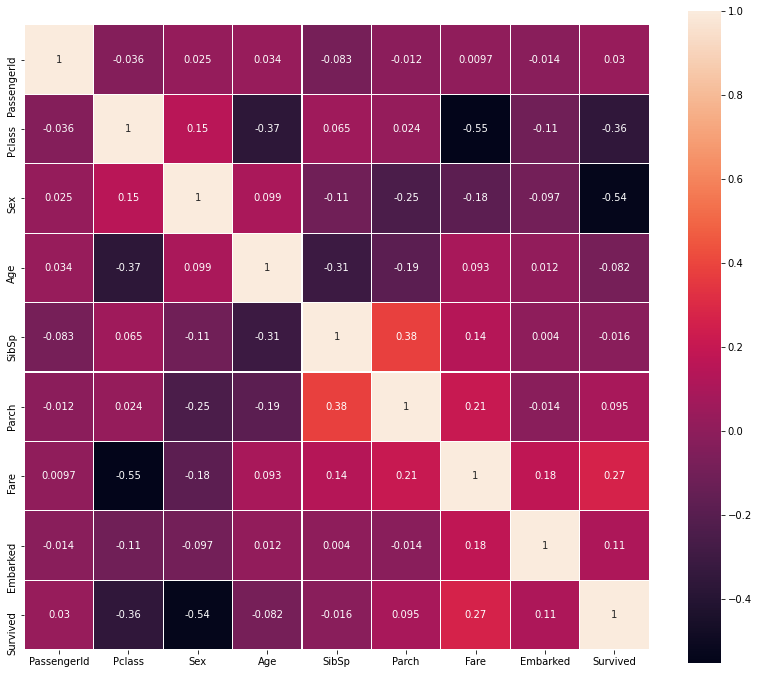

In [45]:
data = runTitanic()
featuresCorrelation(data)
x_train, x_test, y_train, y_test = splitTrainTest(data,'Survived')

Random Forest score: 0.811


,importance
feature,
Embarked,0.022643
Parch,0.039328
SibSp,0.043403
PassengerId,0.095319
Age,0.127131
Pclass,0.154449
Fare,0.175513
Sex,0.342214


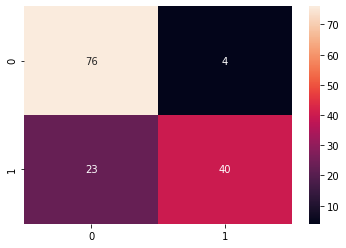

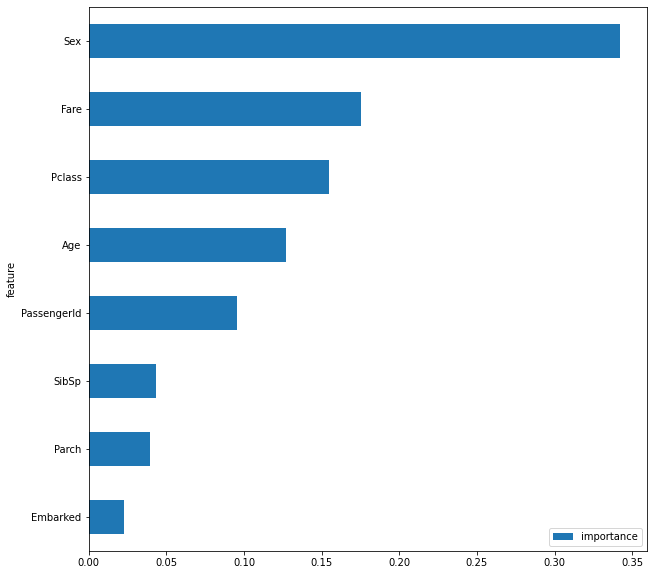

In [46]:
forest = randomForestClassifier(x_train,y_train,x_test,y_test)
featuresImportance(forest,x_train)

Number that Died:  424
Number that Survived :  288


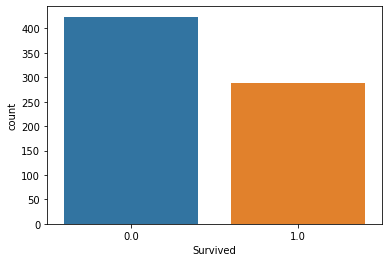

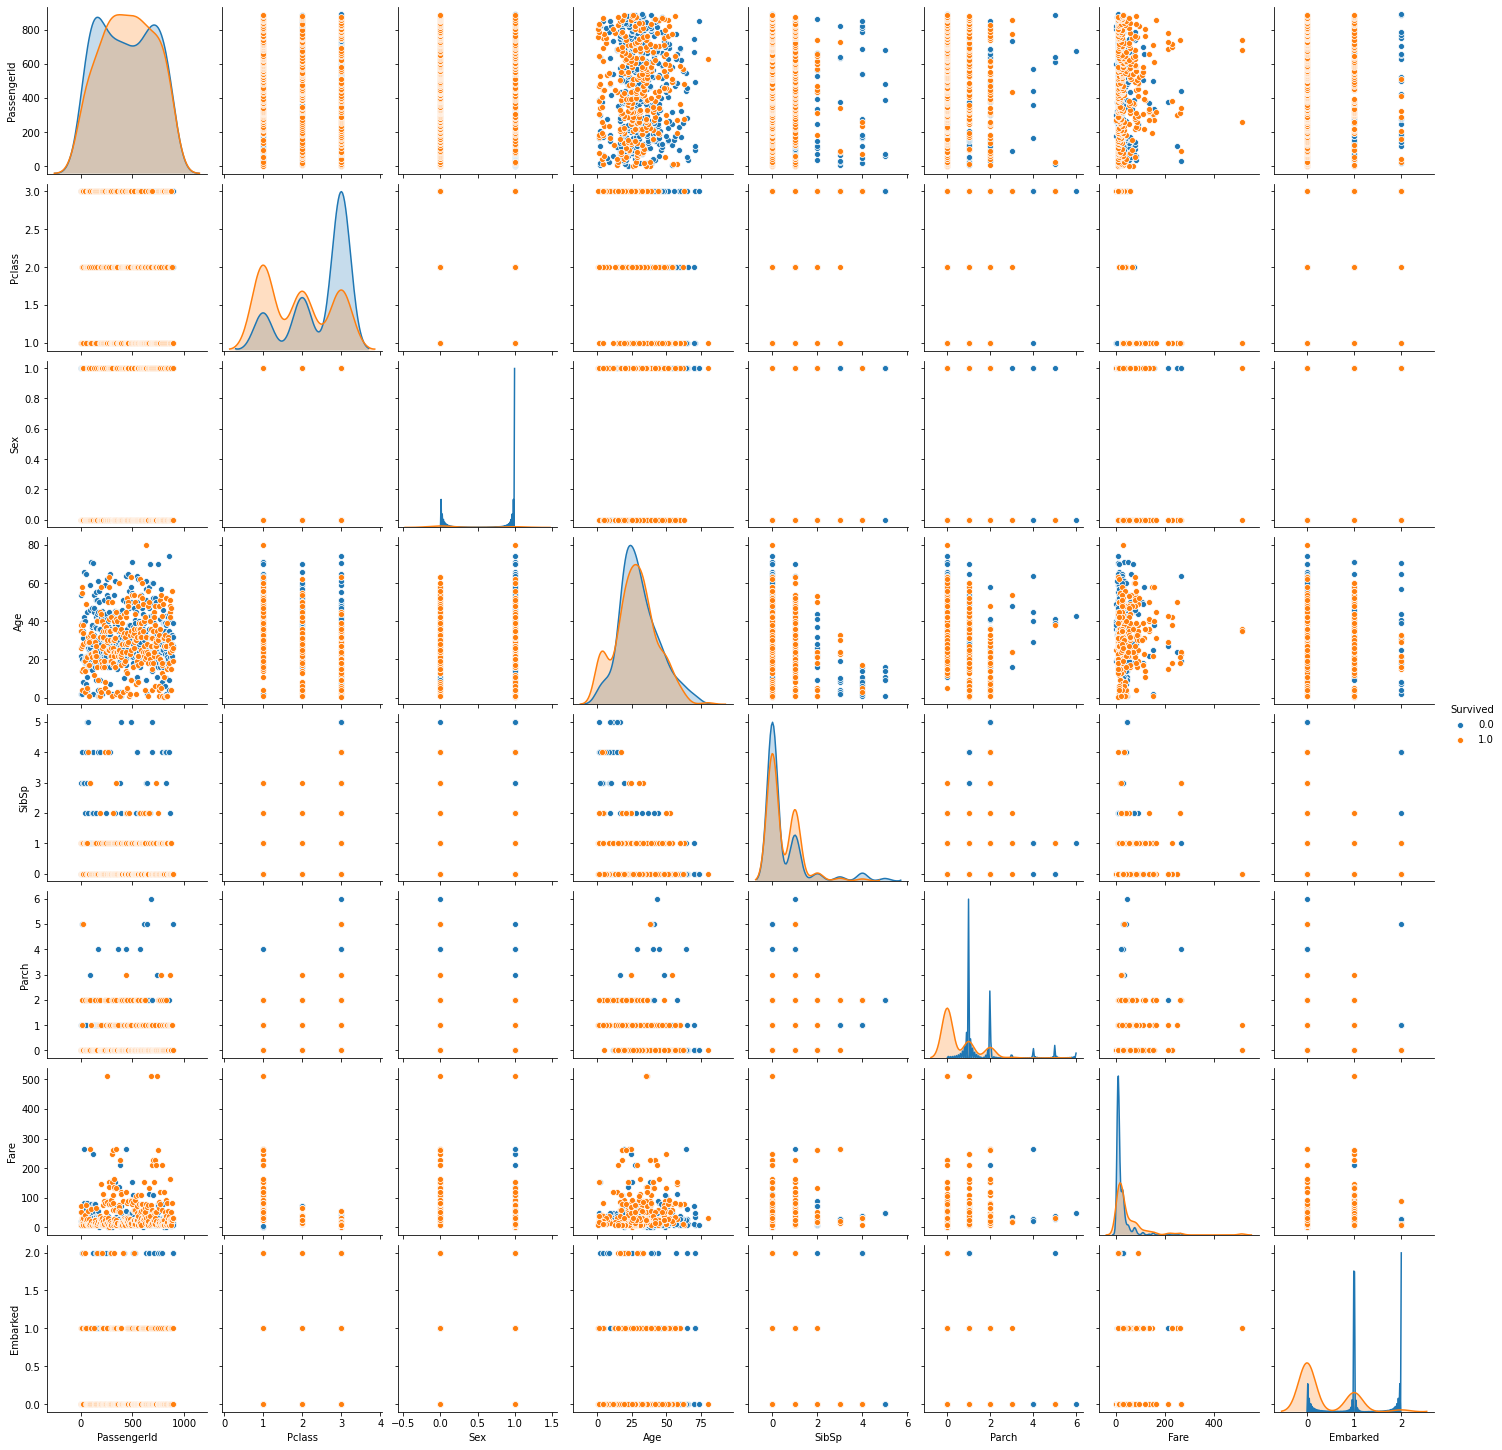

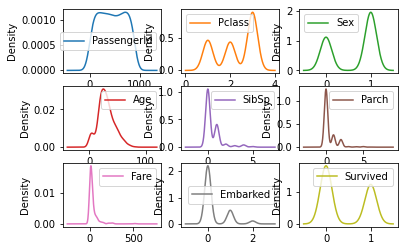

In [47]:
plotTarget(data)
dataVisual(data,"Survived")

In [48]:
compareAlgorithms2(x_train,y_train,x_test,y_test)

LogisticRegression Score: 0.769
LinearDiscriminantAnalysis Score: 0.776
KNeighborsClassifier Score: 0.629
DecisionTreeClassifier Score: 0.664
GaussianNB Score: 0.748
SupportVectorMachines Score: 0.629
RandomForestClassifier Score: 0.79


                       MLA Name  MLA Train Accuracy  ...  MLA Recall   MLA AUC
0            AdaBoostClassifier              0.8506  ...    0.761905  0.824702
4        RandomForestClassifier              1.0000  ...    0.698413  0.799206
2          ExtraTreesClassifier              1.0000  ...    0.650794  0.781647
3    GradientBoostingClassifier              0.9350  ...    0.682540  0.778770
6          LogisticRegressionCV              0.8137  ...    0.650794  0.769147
1             BaggingClassifier              0.9736  ...    0.650794  0.762897
8             RidgeClassifierCV              0.7909  ...    0.634921  0.754960
12                   GaussianNB              0.7873  ...    0.714286  0.744643
11                  BernoulliNB              0.7768  ...    0.634921  0.723710
17       DecisionTreeClassifier              1.0000  ...    0.587302  0.693651
15                        NuSVC              0.7065  ...    0.603175  0.651587
16                    LinearSVC              0.7276 

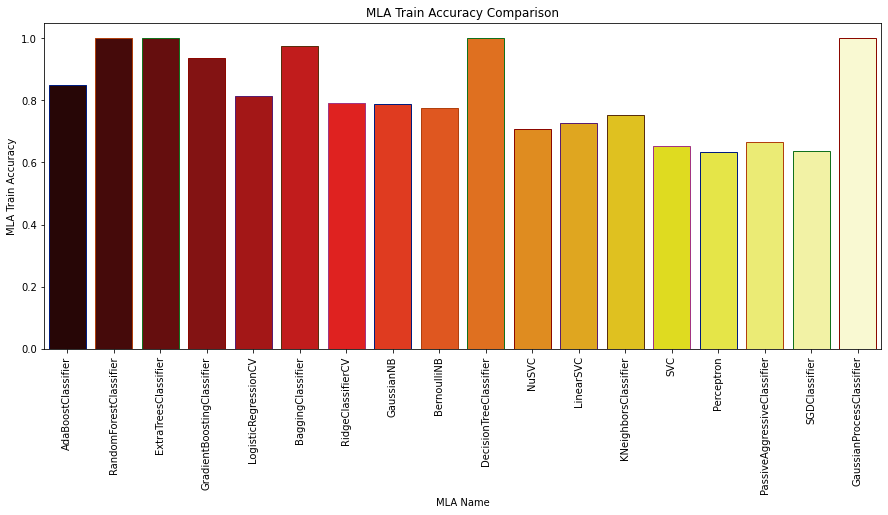

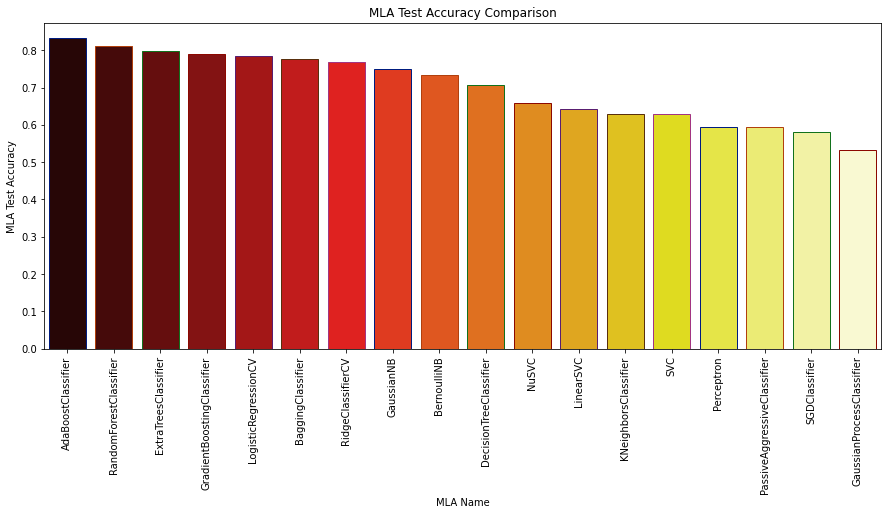

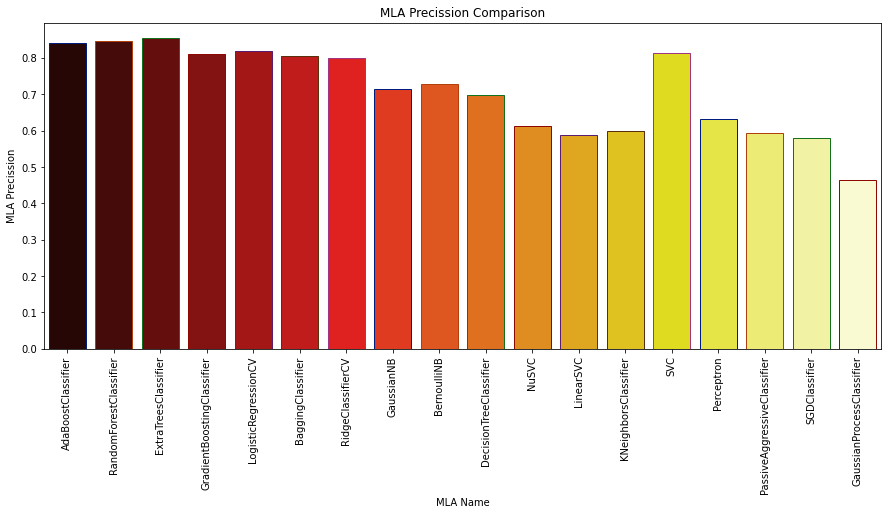

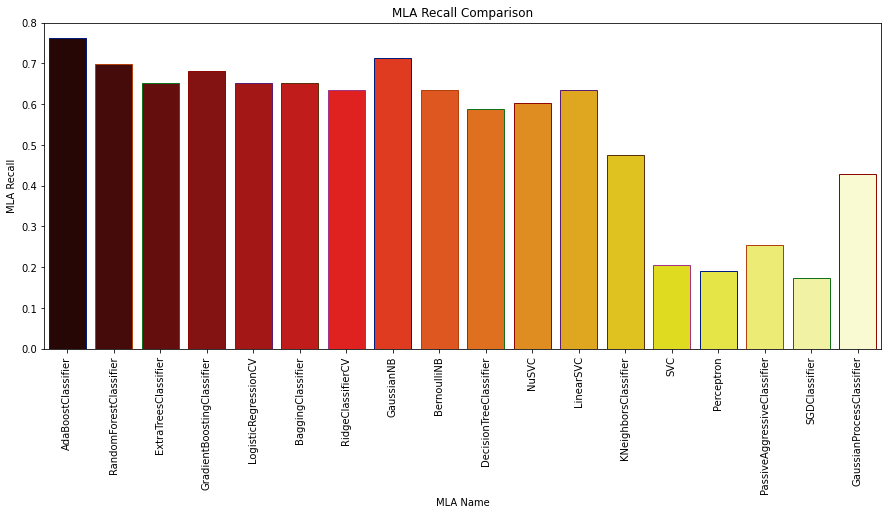

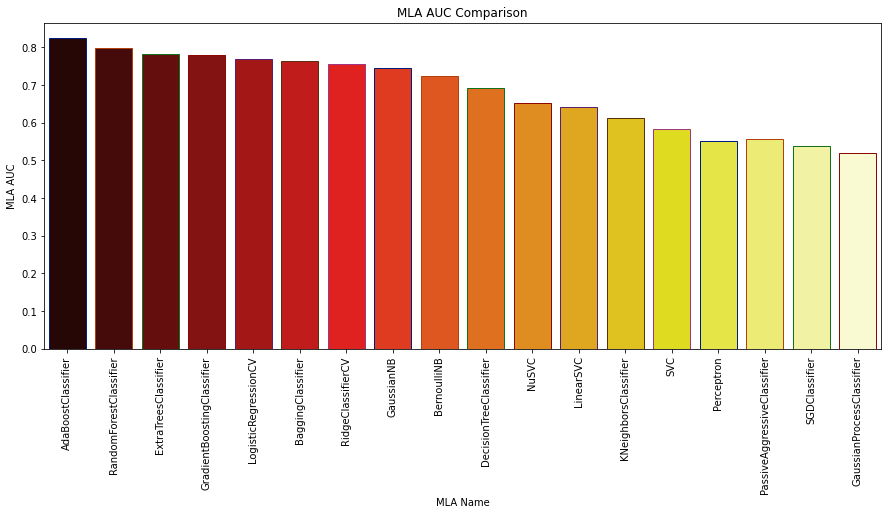

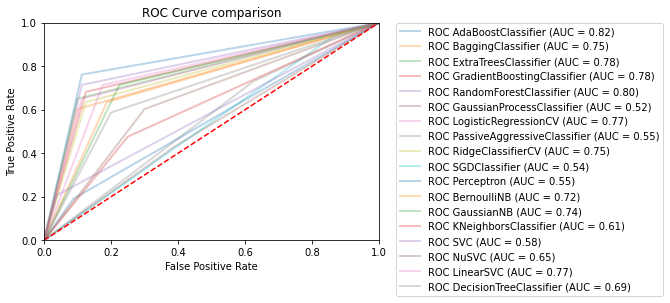

In [49]:
compareAlgorithms(x_train,y_train,x_test,y_test,'true')  

In [52]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
gridSearchForest(x_train,y_train)

Fitting 5 folds for each of 486 candidates, totalling 2430 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2430 out of 2430 | elapsed:  6.7min finished


Best score: 0.8190187859028102
Best parameters: {'bootstrap': False, 'max_depth': 8, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 200}


In [53]:
def draw_missing_data_table(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    print(missing_data)

draw_missing_data_table(data)

             Total  Percent
Survived         0      0.0
Embarked         0      0.0
Fare             0      0.0
Parch            0      0.0
SibSp            0      0.0
Age              0      0.0
Sex              0      0.0
Pclass           0      0.0
PassengerId      0      0.0
